# 聚类模型构建

## 数据处理 

### 准备工作

In [13]:
# Import necessary libraries

# 聚类算法
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, OPTICS, DBSCAN
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
from sklearn.metrics import adjusted_rand_score, silhouette_score
import seaborn as sns
tsne_df = pd.read_csv('data/tsne_df.csv')
print("数据已加载")

# 提取特征（x, y坐标）进行聚类
X = tsne_df[['x', 'y']].values

# 获取真实标签用于后续评估
true_labels = tsne_df['label'].values

数据已加载


## 聚类模型构建

In [14]:
# 应用K-means聚类，设置k=10（对应10个数字）
kmeans = KMeans(n_clusters=10, 
                random_state=42, 
                n_init = 100, 
                max_iter = 1000,
                init = 'k-means++')
kmeans_cluster_labels = kmeans.fit_predict(X)
print("K-means聚类完成")

K-means聚类完成


In [2]:
# 应用高斯混合模型GMM
gmm = GaussianMixture(n_components=10, random_state=42, max_iter=5000, n_init=100)
gmm_labels = gmm.fit_predict(X)
print("高斯混合模型GMM聚类完成")

高斯混合模型GMM聚类完成


In [15]:
# 应用层次聚类
agglo = AgglomerativeClustering(n_clusters=10, linkage='average')
agglo_labels = agglo.fit_predict(X)
print("层次聚类完成")

层次聚类完成


In [16]:
# 对数据进行L2规范化（每个样本的向量长度为1）
X_normalized = normalize(X, norm='l2')

# 应用标准K-means（使用欧氏距离）
kmeans_cosine = KMeans(n_clusters=10, 
                      random_state=42,
                      n_init=100,
                      max_iter=1000)
cosine_labels = kmeans_cosine.fit_predict(X_normalized)
print("基于余弦相似度的K-means聚类完成")

基于余弦相似度的K-means聚类完成


In [17]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(n_clusters=10, 
                      batch_size=50000, 
                      random_state=42,
                      n_init="auto")
mbk_labels = mbk.fit_predict(X)
print("Mini-Batch K-means聚类完成")

print("KMeans: ")
mbk_ari = adjusted_rand_score(true_labels, mbk_labels)
mbk_silhouette = silhouette_score(X, mbk_labels)
print(f"\tAdjusted Rand Index (ARI): {mbk_ari:.4f}")
print(f"\tSilhouette Score: {mbk_silhouette:.4f}")

Mini-Batch K-means聚类完成
KMeans: 
	Adjusted Rand Index (ARI): 0.7017
	Silhouette Score: 0.4134


## 聚类评估

In [18]:
# 评估聚类性能

# 兰德指数 (ARI)， 用于评估聚类结果与真实标签之间的一致性
# ARI范围在[-1, 1]之间，越接近1表示聚类效果越好
# 轮廓系数 (Silhouette Score)， 用于评估聚类的紧密度和分离度
# 轮廓系数范围在[-1, 1]之间，越接近1表示聚类效果越好

print("KMeans: ")
kmeans_ari = adjusted_rand_score(true_labels, kmeans_cluster_labels)
kmeans_silhouette = silhouette_score(X, kmeans_cluster_labels)
print(f"\tAdjusted Rand Index (ARI): {kmeans_ari:.4f}")
print(f"\tSilhouette Score: {kmeans_silhouette:.4f}")

print("Gaussian Mixture Model (GMM): ")
gmm_ari = adjusted_rand_score(true_labels, gmm_labels)
gmm_silhouette = silhouette_score(X, gmm_labels)
print(f"\tAdjusted Rand Index (ARI): {gmm_ari:.4f}")
print(f"\tSilhouette Score: {gmm_silhouette:.4f}")

print("Agglomerative Clustering: ")
agglo_ari = adjusted_rand_score(true_labels, agglo_labels)
agglo_silhouette = silhouette_score(X, agglo_labels)
print(f"\tAdjusted Rand Index (ARI): {agglo_ari:.4f}")
print(f"\tSilhouette Score: {agglo_silhouette:.4f}")

print("KMeans: ")
cosine_kmeans_ari = adjusted_rand_score(true_labels, cosine_labels)
cosine_kmeans_silhouette = silhouette_score(X, cosine_labels)
print(f"\tAdjusted Rand Index (ARI): {cosine_kmeans_ari:.4f}")
print(f"\tSilhouette Score: {cosine_kmeans_silhouette:.4f}")

KMeans: 
	Adjusted Rand Index (ARI): 0.7096
	Silhouette Score: 0.4196
Gaussian Mixture Model (GMM): 
	Adjusted Rand Index (ARI): 0.8933
	Silhouette Score: 0.4080
Agglomerative Clustering: 
	Adjusted Rand Index (ARI): 0.8214
	Silhouette Score: 0.4143
KMeans: 
	Adjusted Rand Index (ARI): 0.5556
	Silhouette Score: 0.2786


# 聚类效果可视化

## 初始混淆矩阵

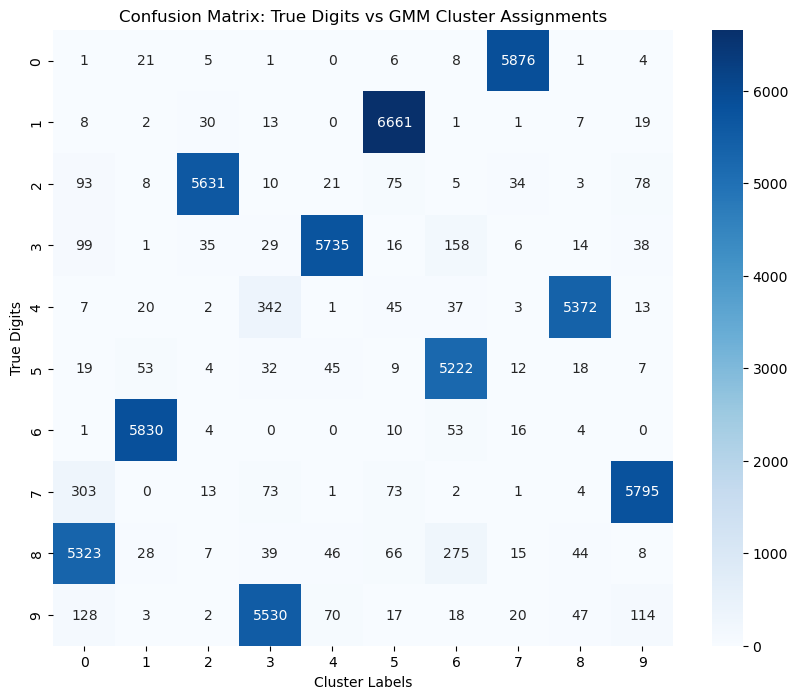

In [19]:
import matplotlib.pyplot as plt
# Create confusion matrix to analyze clustering quality
conf_mat = np.zeros((10, 10), dtype=int)
for i in range(len(true_labels)):
    true_label = int(true_labels[i])  # 确保索引为整数
    cluster = gmm_labels[i]
    conf_mat[true_label, cluster] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Cluster Labels')
plt.ylabel('True Digits')
plt.title('Confusion Matrix: True Digits vs GMM Cluster Assignments')
plt.savefig('picture/gmm_confusion_matrix.png', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

In [20]:
# 创建聚类标签到实际数字的映射
cluster_to_digit_map = {}

# 使用之前计算的混淆矩阵确定最佳映射
for cluster_id in range(10):
    # 找出该聚类中数量最多的真实数字
    digit = np.argmax(conf_mat[:, cluster_id])
    cluster_to_digit_map[cluster_id] = digit

# 应用映射，创建新的标签
mapped_labels = np.array([cluster_to_digit_map[label] for label in gmm_labels])

# 检查映射后的准确率
accuracy = np.mean(mapped_labels == true_labels)
print(f"映射后的准确率: {accuracy:.4f}")

# 显示映射关系
print("聚类标签到数字的映射关系:")
for cluster, digit in cluster_to_digit_map.items():
    print(f"聚类 {cluster} -> 数字 {digit}")

映射后的准确率: 0.9496
聚类标签到数字的映射关系:
聚类 0 -> 数字 8
聚类 1 -> 数字 6
聚类 2 -> 数字 2
聚类 3 -> 数字 9
聚类 4 -> 数字 3
聚类 5 -> 数字 1
聚类 6 -> 数字 5
聚类 7 -> 数字 0
聚类 8 -> 数字 4
聚类 9 -> 数字 7


## 修正后的混淆矩阵

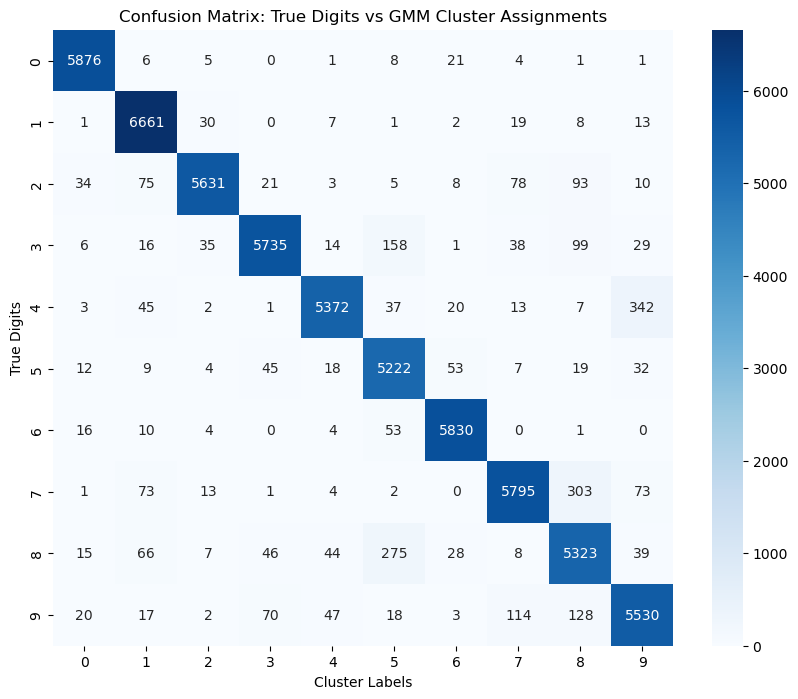

In [21]:
conf_mat = np.zeros((10, 10), dtype=int)
for i in range(len(true_labels)):
    true_label = int(true_labels[i])  # 确保索引为整数
    cluster = mapped_labels[i]
    conf_mat[true_label, cluster] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Cluster Labels')
plt.ylabel('True Digits')
plt.title('Confusion Matrix: True Digits vs GMM Cluster Assignments')
plt.savefig('picture/gmm_confusion_matrix.png', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

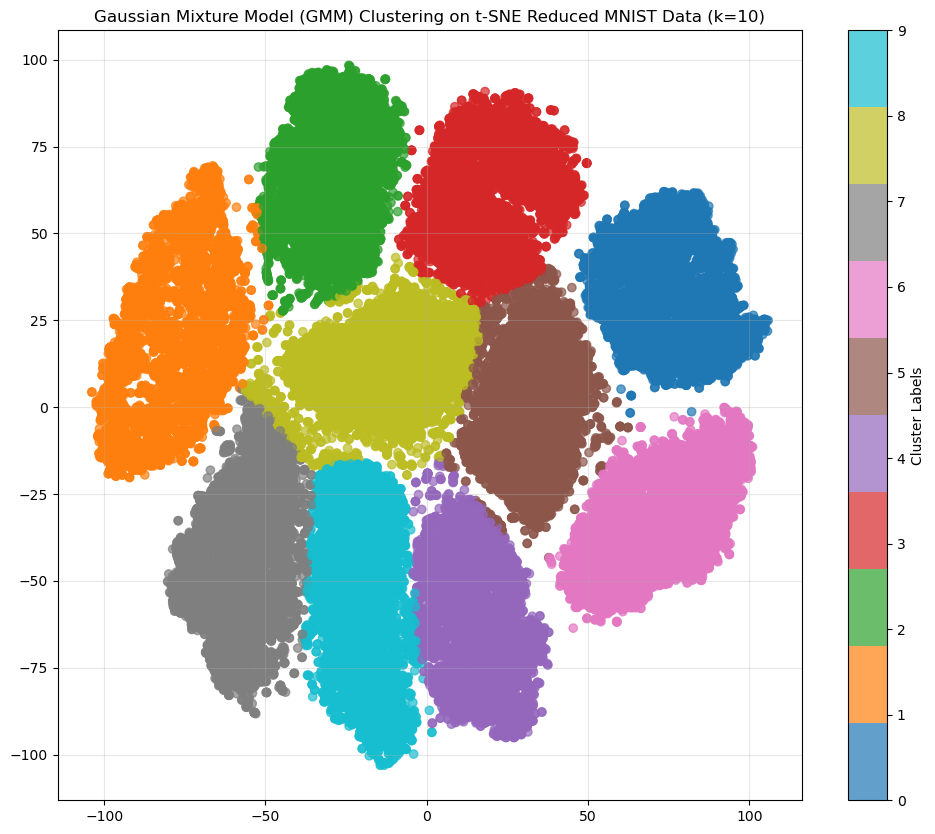

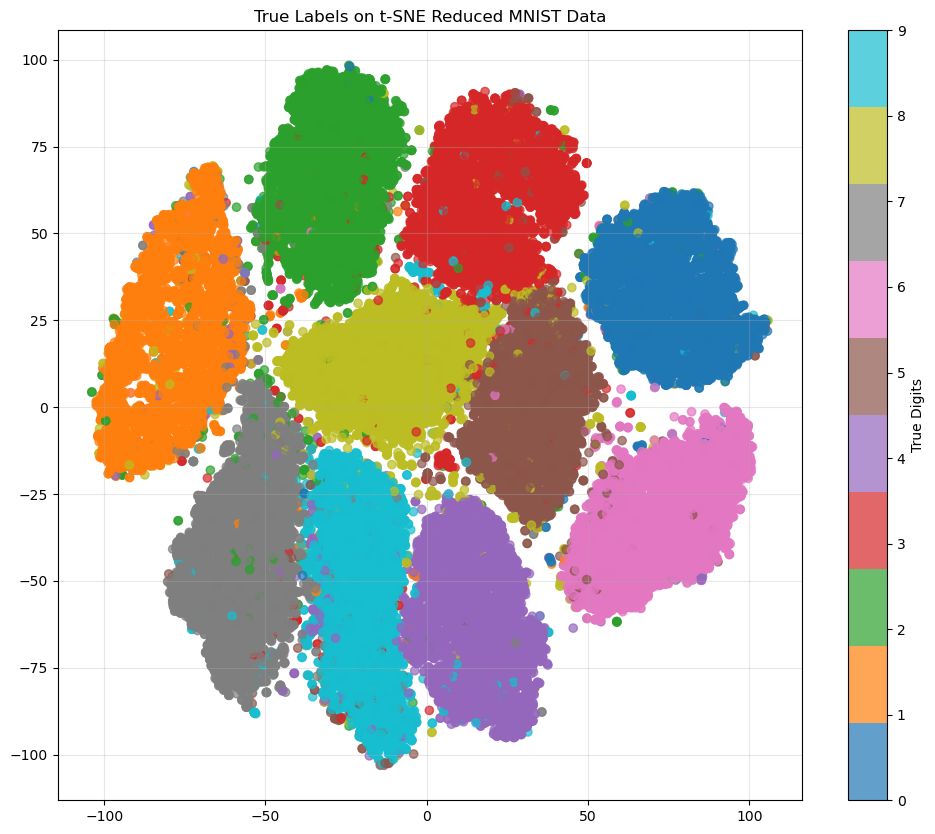

In [25]:
# Visualize clustering results
plt.figure(figsize=(12, 10))

# Plot GMM clustering
scatter = plt.scatter(X[:, 0], X[:, 1], c=mapped_labels, cmap='tab10', alpha=0.7)
# GMM doesn't have cluster centers like K-means

plt.title('Gaussian Mixture Model (GMM) Clustering on t-SNE Reduced MNIST Data (k=10)')
plt.colorbar(scatter, label='Cluster Labels')
plt.grid(True, alpha=0.3)
plt.savefig('picture/gmm_clustering.png', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

# Compare with true labels
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='tab10', alpha=0.7)
plt.title('True Labels on t-SNE Reduced MNIST Data')
plt.colorbar(scatter, label='True Digits')
plt.grid(True, alpha=0.3)
plt.savefig('picture/true_labels.png', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()


In [27]:
import pickle

# 保存 mapped_labels 到文件
with open('data/clustered_data/mapped_labels.pkl', 'wb') as f:
    pickle.dump(mapped_labels, f)

print("mapped_labels 已保存到 mapped_labels.pkl 文件中")

mapped_labels 已保存到 mapped_labels.pkl 文件中


In [ ]:
# 步骤2: 假设有一个新的数据点(需要与训练数据格式相同，即t-SNE降维后的2D坐标)
new_point = np.array([[16.549015, 8.444596]])  # 替换为实际坐标值

# 步骤3: 使用GMM模型预测聚类标签
cluster_label = gmm.predict(new_point)[0]  # [0]是因为predict返回数组

# 步骤4: 将聚类标签映射到实际数字
predicted_digit = cluster_to_digit_map[cluster_label]

print(f"聚类标签: {cluster_label}")
print(f"预测的数字: {predicted_digit}")

聚类标签: 6
预测的数字: 5
各聚类的概率: [3.27147173e-01 4.01961104e-11 6.76718696e-08 4.40102428e-07
 6.74230509e-03 7.36631906e-17 6.65167940e-01 4.50033364e-06
 9.37573356e-04 2.71968707e-11]


In [28]:
X

array([[ 36.36445236,   0.23439641],
       [ 73.17466736,  40.00993729],
       [ 29.08797455, -72.02829742],
       ...,
       [ 32.48831558,  -0.36538902],
       [ 65.21448517, -52.72030258],
       [-41.50618744,  10.5536232 ]])

In [29]:
new_point

array([[26.4107399 , 68.84806061]])

新数据点: [26.4107399  68.84806061]
最近的训练点: [26.4107399  68.84806061]
该点的标签: 3
距离: 0.0000


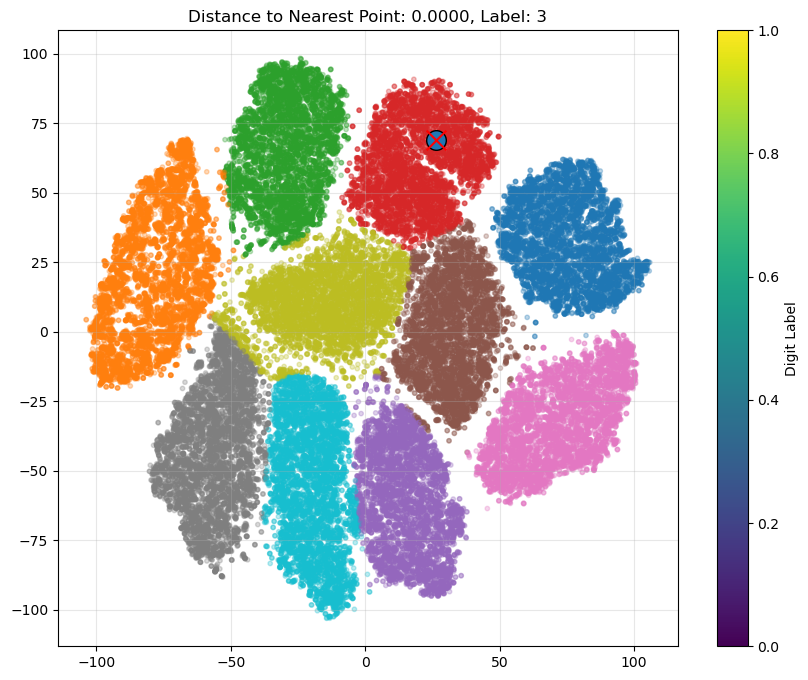

In [11]:
# 新数据点
new_point = np.array([[26.4107399 , 68.84806061]])

# 使用我们创建的函数
nearest_point, nearest_label, distance = find_nearest_point(new_point, X, mapped_labels)

print(f"新数据点: {new_point[0]}")
print(f"最近的训练点: {nearest_point}")
print(f"该点的标签: {nearest_label}")
print(f"距离: {distance:.4f}")

# 可视化结果
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=mapped_labels, cmap='tab10', alpha=0.3, s=10)
plt.scatter(nearest_point[0], nearest_point[1], c=nearest_label, cmap='tab10', s=200, edgecolors='black')
plt.scatter(new_point[0, 0], new_point[0, 1], c='red', marker='x', s=200)

# 绘制连接线
plt.plot([new_point[0, 0], nearest_point[0]], [new_point[0, 1], nearest_point[1]], 'k--')

plt.title(f'Distance to Nearest Point: {distance:.4f}, Label: {nearest_label}')
plt.colorbar(label='Digit Label')
plt.grid(True, alpha=0.3)
plt.show()